<a href="https://colab.research.google.com/github/trawman/mkt_regression/blob/master/mkt_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descrição**

Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para entender melhor a relação entre as variáveis presentes nesses registros e  identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um
modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.


A tabela contém informações dos investimentos feitos pelo youtube, facebook,
newspaper e também a quantidade de cada.


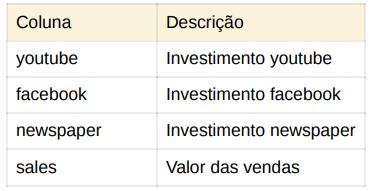

# **1. Pre-processing**

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import plotly.express as px
import numpy as np

In [ ]:
MKT = pd.read_csv('MKT.csv')

In [ ]:
df = pd.DataFrame(MKT)
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


# **2. Feature selection**

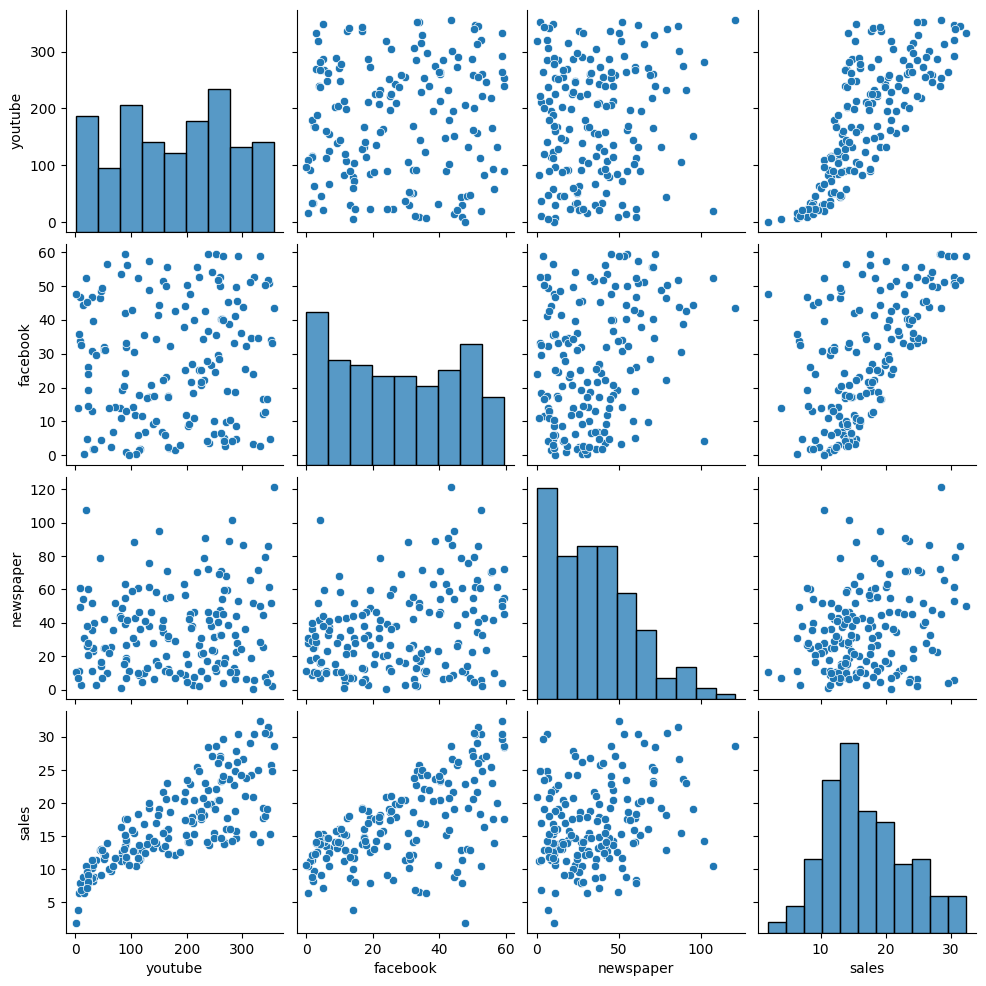

In [ ]:
sns.pairplot(df)

<Axes: >

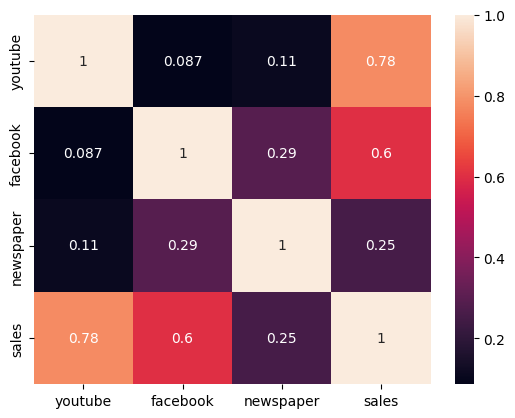

In [ ]:
sns.heatmap(df.corr(), annot = True)

Text(0, 0.5, 'sales')

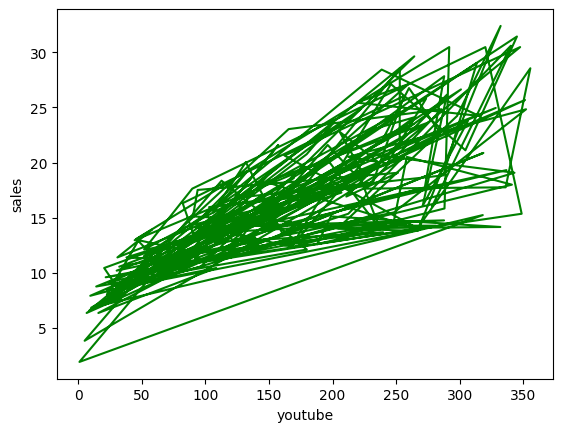

In [ ]:
x = df['youtube']
y = df['sales']
plt.plot(x,y, color='green')
plt.xlabel('youtube')
plt.ylabel('sales')

<Axes: xlabel='facebook', ylabel='sales'>

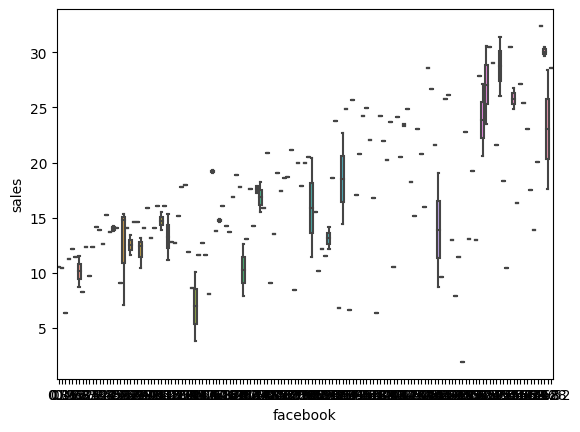

In [ ]:
sns.boxplot(x= df["facebook"], y= df["sales"], data=df)

<Axes: xlabel='newspaper', ylabel='sales'>

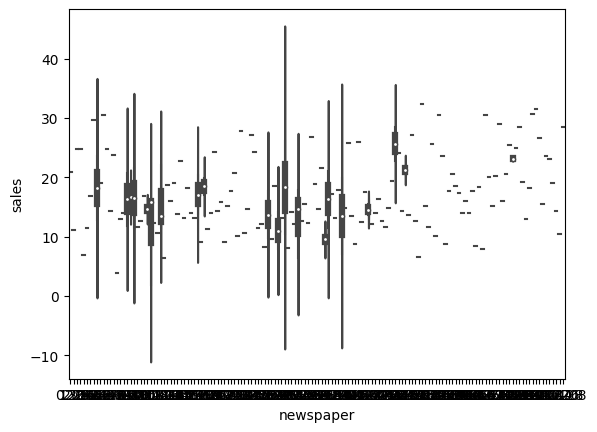

In [ ]:
sns.violinplot(x= df["newspaper"], y= df["sales"], data=df)

# **3. Model selection**

In [ ]:
def preparing_features(df):
    X = df[['youtube']]
    y = df['sales']
    return X, y

In [ ]:
def train_model(X, y):
    model = DecisionTreeRegressor(max_depth=2)
    model.fit(X, y)
    return model

# **4. Model stage**

In [ ]:
def run():
    df = MKT
    X, y = preparing_features(df)

In [ ]:
X, y = preparing_features(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [ ]:
if __name__ == "__main__":
    run()

In [ ]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

model = train_model(X_train, y_train)

# **5. Model validation**

In [ ]:
score = r2_score(X_test,y_test)
print('valor:', score)

valor: -2.40311727657968


In [ ]:
mean_square = mean_squared_error(X_test,y_test)
print('mean-square:', mean_square)

mean-square: 35588.68533722628


In [ ]:
print(np.sqrt(mean_square))

188.64963646195102


# **6. Deployment flavor**

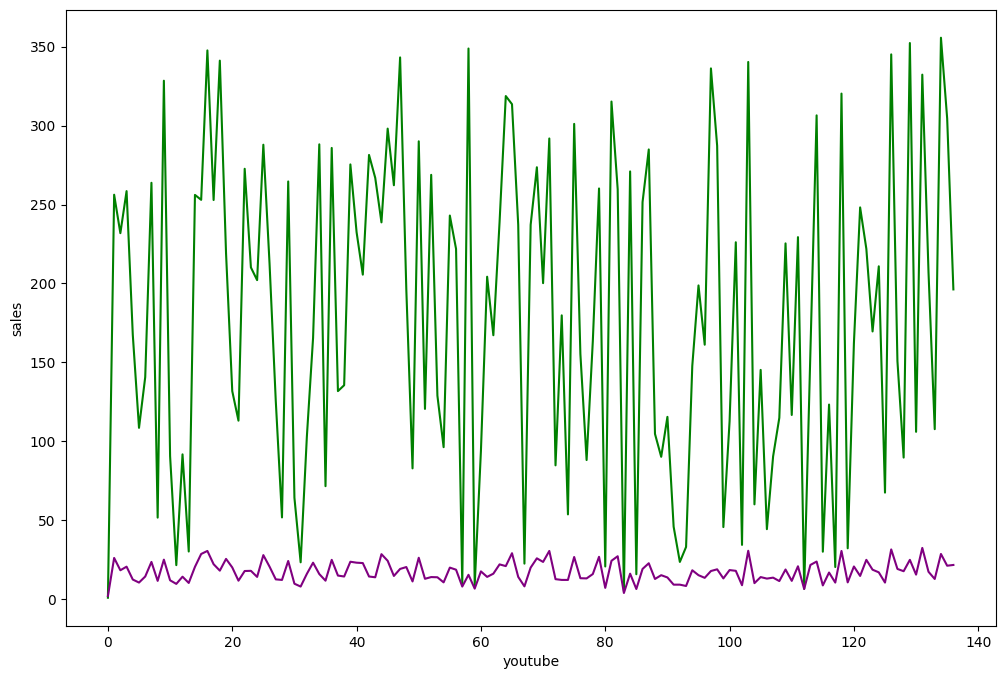

In [ ]:
plot = [i for i in range(len(X_test))]
fig = plt.figure(figsize=(12, 8))
plt.plot(plot, X_test, color='green', label='X_test')
plt.plot(plot, y_test, color='purple', label='y_test')
plt.xlabel('youtube')
plt.ylabel('sales')
plt.show()

In [ ]:
svr_model = SVR()
svr_fit = svr_model.fit(X_train, y_train.ravel())
X_test_reshaped = X_test.values.reshape(-1, 1)
svr_pred = svr_model.predict(X_test_reshaped)
score = r2_score(y_test, svr_pred)
print('R^2 score:', score)

R^2 score: 0.09142349621650603


In [ ]:
mean_square = mean_squared_error(svr_pred,y_test)
print(mean_square)
print(np.sqrt(mean_square))

38.87873526679954
6.2352814905824046


Text(0, 0.5, 'sales')

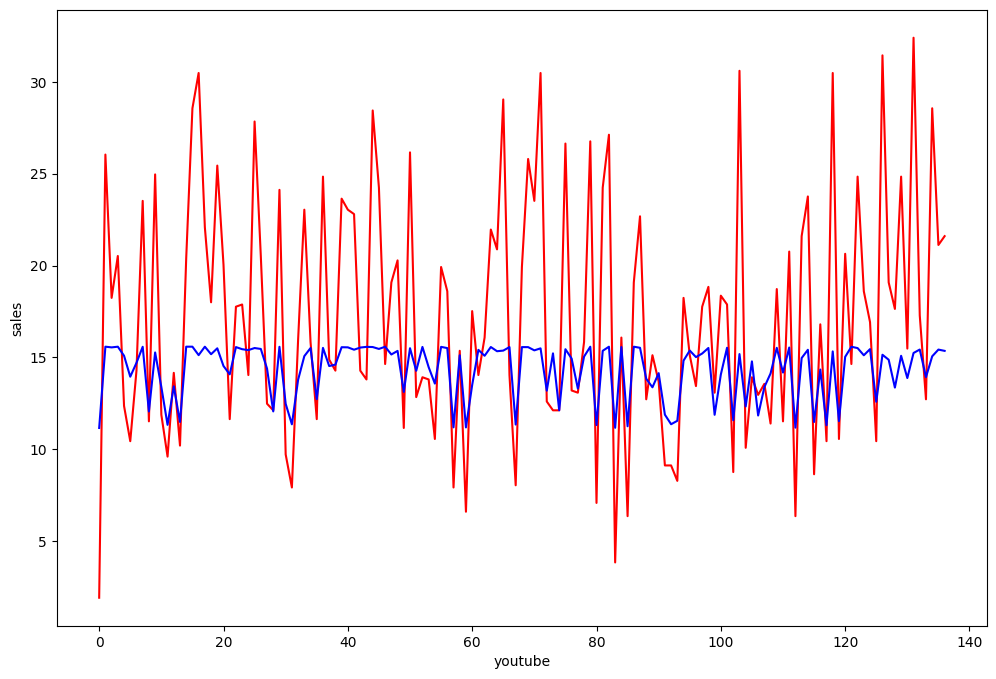

In [ ]:
plot = [i for i in range(len(svr_pred))]
fig = plt.figure(figsize = (12,8))
plt.plot(plot, y_test, color = 'red')
plt.plot(plot, svr_pred, color = 'blue')
plt.xlabel('youtube')
plt.ylabel('sales')